In [1]:
from typing import Literal,TypedDict

class PortFolioState(TypedDict):
    amount_usd:float
    total_usd:float
    target_currency:Literal["INR","EUR"]
    total:float

In [2]:
def calc_total(state:PortFolioState)->PortFolioState:
    state["total_usd"]=state["amount_usd"]*1.08
    return state

def convert_in_inr(state:PortFolioState)->PortFolioState:
    state["total"]=state["total_usd"]*88.1
    return state

def convert_in_eur(state:PortFolioState)->PortFolioState:
    state["total"]=state["total_usd"]*0.8512
    return state

def choose_conversion(state: PortFolioState) -> str:
    return state["target_currency"]


In [4]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortFolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_in_inr)
builder.add_node("convert_to_eur_node", convert_in_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node",
    }
)
builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

graph = builder.compile()

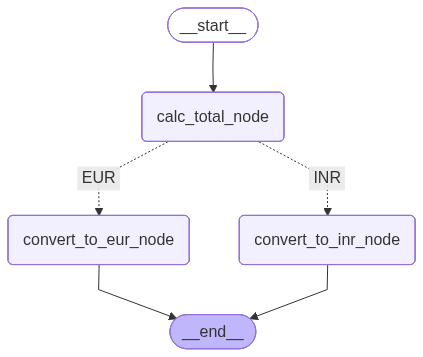

In [5]:
from IPython.display import display
display(graph)

In [7]:
graph.invoke({"amount_usd": 1000, "target_currency": "INR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'INR',
 'total': 95148.0}